# 트리

## 목차

### 1. 트리
### 2. 이진 트리
### 3. 이진 트리의 표현
### 4. 이진 트리 저장
### 5. 이진탐색 트리
### 6. 힙

## 1. 트리

### 트리
비선형 자료구조(원소들 간에 1 : n 관계를 가지는 자료구조)

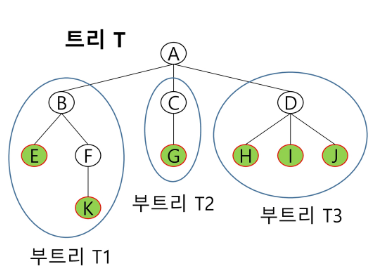
- 계층형 자료구조
- 상위원소에서 하위 원소로 내려가면서 확장
- 한 개 이상의 노드로 이루어진 유한 집합
    - 최상위 노드 : root
    - 나머지 : N개의 분리 집합(T1, T2, ... , TN)으로 분리될 수 있다
    - 나머지는 각각 하나의 트리가 될 수 있다(루트의 부 트리 : subtree of root)
- root : 트리의 시작 노드
- node, vertex : 정점
- leaf : 단말 노드
- edge : 간선 - 부모와 자식 노드를 연결
- sibling : 형제 노드 - 같은 부모 노드의 자식 노드들
- 조상 노드 : 간선을 따라 루트 노드까지 이르는 경로에 있는 모든 노드들
- subtree : 부모 노드와 연결된 간선을 끊었을 때 생성되는 트리
- 자손 노드 : 서브 트리에 있는 하위레벨의 노드들

#### 차수
- 노드의 차수 : 노드에 연결된 자식 노드의 수
- 트리의 차수 : 트리에 있는 노드의 차수 중 가장 큰 값
- 리프 노드 : 자식노드가 없는(차수가 0인) 노드
#### 높이
- 노드의 높이 : 루트에서 노드에 이르는 간선의 수(노드의 레벨)
- 트리의 높이 : 트리에 있는 노드의 높이 중에서 가장 큰 값(최대 레벨)

## 2. 이진 트리

### 이진 트리
모든 노드들이 2개의 서브트리를 가지는 특별한 형태의 트리
- 각 노드가 자식노드를 최대 2개까지(왼쪽 / 오른쪽) 가질 수 있는 트리
- 레벨 i에서 노드의 최대 개수 : 2^i
- 높이가 h인 이진 트리의 노드 최소 개수 : h+1 / 최대 개수 : 2^(h+1) - 1

### 포화 이진 트리
모든 레벨의 노드가 포화상태로 차 있는 이진 트리
- 높이가 h일 때 최대의 노드 개수만큼의 노드를 가진 이진 트리

### 완전 이진 트리
높이가 h이고 노드 수가 n개일 때(2^h <= n <= 2^(h+1)-1) 포화 이진트리의 노드 번호 1번부터 n번까지의 빈 자리가 없는 이진 트리

### 편향 이진 트리
높이 h에 대한 최소 개수의 노드를 가지면서 한쪽 방향의 자식 노드만을 가진 이진 트리


### 이진트리 순회
트리의 각 노드를 중복되지 않게 전부 방문하는 것
- 선형구조와 같이 선후 연결 관계를 알 수 없음 -> 특별한 방법 필요
#### 이진트리 순회 방법
1. 전위순회(VLR) : 부모노드를 방문한 후, 자식 노드를 좌/우 순서로 방문
2. 중위순회(LVR) : 왼쪽 자식노드, 부모노드, 오른쪽 자식노드 순으로 방문
3. 후위순회(LRV) : 자식노드를 좌우 순서로 방문 후 부모노드 방문

#### 전위 순회 수행 방법
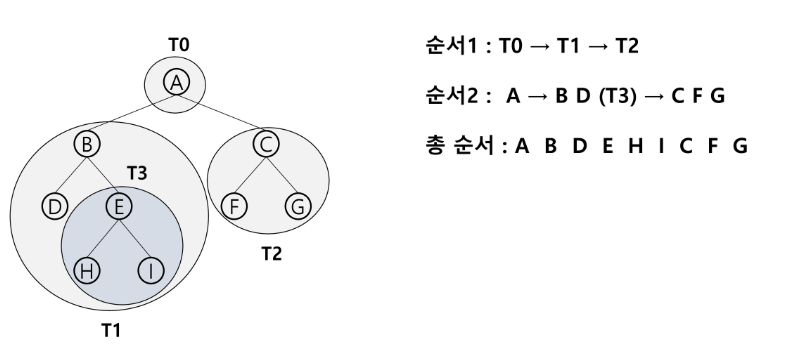
1. 현재 노드 n을 방문하여 처리(V)
2. 현재 노드 n의 왼쪽 서브트리로 이동(L)
3. 현재 노드 n의 오른쪽 서브트리로 이동(R)

In [ ]:
def preorder_traverse(T):
    if T:
        visit(T) # print(T.item)
        preorder_traverse(T.left)
        preorder_traverse(T.right)

#### 중위 순회 수행 방법
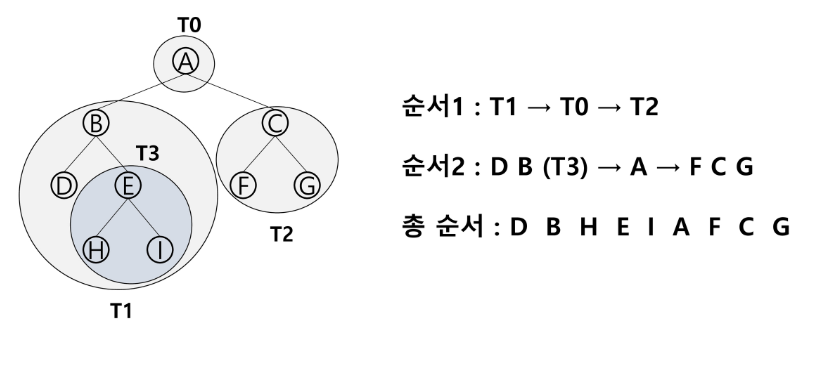
1. 현재 노드 n의 왼쪽 서브트리로 이동(L)
2. 현재 노드 n을 방문하여 처리(V)
3. 현재 노드 n의 오른쪽 서브트리로 이동(R)

In [ ]:
def inorder_traverse(T):
    if T:
        inorder_traverse(T.left)
        visit(T)
        inorder_traverse(T.right)

#### 후위 순회 방법
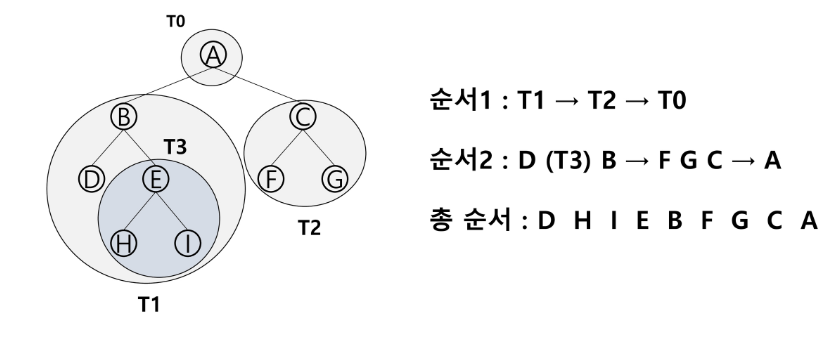
1. 현재 노드 n의 왼쪽 서브트리로 이동 : L
2. 현재 노드 n의 오른쪽 서브트리로 이동 : R
3. 현재 노드 n을 방문하여 처리

In [ ]:
def postorder_traverse(T):
    if T:
        postorder_traverse(T.left)
        postorder_traverse(T.right)
        visit(T)

## 3. 이진 트리의 표현

### 배열을 이용한 이진 트리 표현
이진 트리에 각 노드 번호를 부여하는 법
- 루트의 번호 : 1
- 레벨 n에 있는 노드에 대해 왼쪽부터 오른쪽으로 2^n ~ 2^(n+1)-1까지 번호 부여

#### 노드번호의 성질
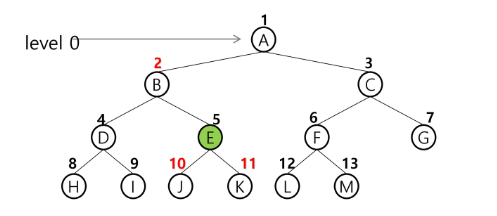
- 노드 번호가 i인 노드의 부모 노드 번호 : i//2
- 노드 번호가 i인 노드의 왼쪽 자식 노드 번호 : 2 * i
- 노드 번호가 i인 노드의 오른쪽 자식 노드 번호 : 2 * i + 1
- 레벨 n의 노드 번호 시작 : 2^n

#### 이진 트리 저장
1. 부모 번호를 인덱스로 자식 번호 저장
2. 자식 번호를 인덱스로 부모 번호 저장
3. 루트노드, 조상노드 찾기

In [ ]:
def make_tree(idx): # 시작 인덱스 부여
    global node # 각 레벨 별 노드
    if idx <= N: # 시작 인덱스가 아직 노드 개수보다 적을 경우
        make_tree(idx*2) # 해당 인덱스에 2를 곱한 값을 시작 인덱스로 하여 트리 생성
        tree[idx] = node # 
        node += 1
        make_tree(idx*2+1)



T = int(input())
for test_case in range(1, T+1):
    N = int(input()) # 1 <= N <= 1000
    # 이진 탐색 트리 규칙 : 왼쪽 서브트리 루트 < 현재 노드 < 오른쪽 서브트리 루트
    tree = [0] * (N+1)
    node = 1
    make_tree(1)
    print(f'#{test_case} {tree[1]} {tree[N//2]}')

## 4. 이진 탐색 트리

### 이진탐색 트리
탐색작업을 효율적으로 하기 위한 자료구조
- 모든 원소는 서로 다른 유일한 키를 갖는다
- 왼쪽 서브트리의 key < 루트 노드의 key < 오른쪽 서브트리의 key
- 중위 순회 시, 오름차순으로 정렬된 값을 얻을 수 있다

#### 이진탐색 트리 탐색연산
1. 루트에서 시작한다
2. 탐색할 기 값(X)를 루트 노드의 키 값과 비교한다
    - X = 루트노드 key인 경우 : 원하는 원소 탐색 성공
    - X < 루트노드 key인 경우 : 루트노드의 왼쪽 서브트리에 대해 탐색연산
    - X > 루트노드 key인 경우 : 루트노드의 오른쪽 서브트리에 대해 탐색연산
3. 서브트리에 대해 순환적으로 탐색 연산 반복

#### 이진트리 삽입 연산
1. 탐색 연산 수행
    - 삽입할 원소와 같은 원소가 트리에 있을 경우 삽입 불가
    - 탐색에서 탐색 실패가 결정되는 위치가 곧 삽입 위치가 된다
2. 탐색을 실패한 위치에 원소 삽입

#### 이진탐색트리의 성능
- 탐색, 삽입, 삭제 연산의 시간 = 트리의 높이(O(h) for h : height of BST)
- 평균(이진 트리가 균형적으로 생성되어있을 시) : O(log(n))
- 최악(한쪽으로 치우친 경사 이진트리) : O(n)

## 5. 힙

### 힙
완전 이진 트리에 있는 노드 중, 키 값이 가장 큰 노드나 키 값이 가장 작은 노드를 찾기 위해 만든 자료구조
- 완전이진트리임을 명심!!!

#### 최대 힙
키값이 가장 큰 노드를 찾기 위한 완전이진트리
- 부모노드의 키값 > 자식노드의 키값
- -> 루트 노드 : 키값이 가장 큰 노드
#### 최소 힙
키값이 가장 작은 노드를 찾기 위한 완전 이진 트리
- 부모노드의 키값 < 자식노드의 키값
- -> 루트 노드 : 키값이 가장 작은 노드

#### 힙 연산
1. 삽입
- 완전이진트리는 1차원배열로 생성 가능
- 힙의 규칙에 따라(최대/최소) 삽입한 값의 부모노드와 비교(삽입한 값 인덱스 : N+1 -> 부모노드 인덱스 : (N+1)//2)
- 알맞을 경우 상황 종료
- 기존 힙 규칙에 위배될 경우, 부모노드와 자리 바꾸기
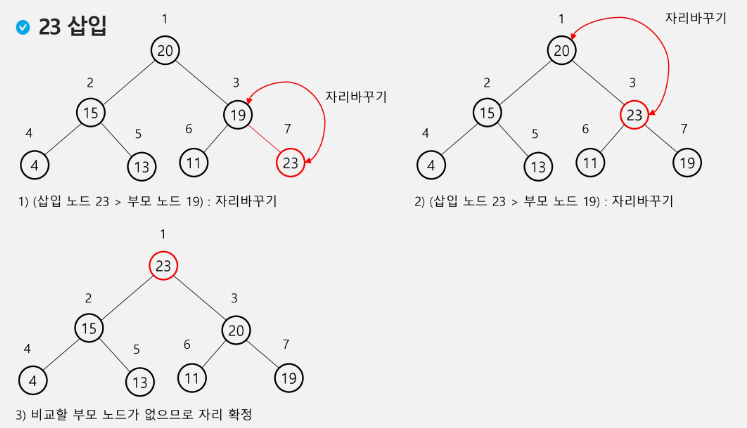

2. 삭제

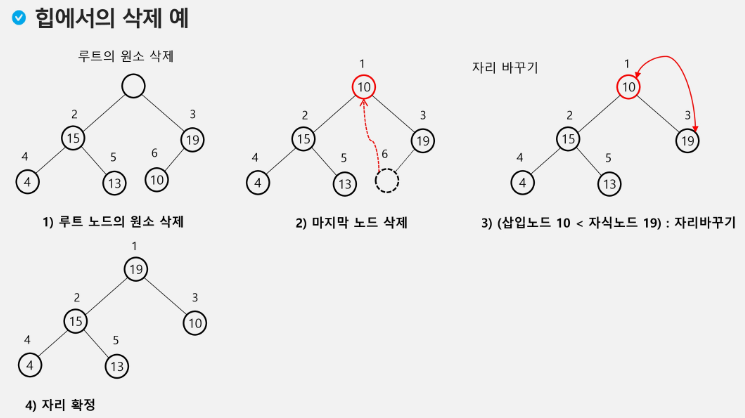

In [ ]:
# 힙 삽입
def enq():
    global last
    

In [ ]:
# 힙 삭제
def deq():
    global last
    tmp = heap[1]         # 루트 백업 
    heap[1] = heap[last]  # 삭제할 노드의 키를 루트에 복사
    last -= 1             # 마지막 노드 삭제
    p = 1                 # 루트에 옮긴 값을 자식과 비교
    c = p * 2             # 왼쪽 자식
    while c <= last:      # 자식이 하나라도 있을 경우(왼쪽이 있어야 오른쪽이 있음)
        if c + 1 <= last and heap[c] < heap[c + 1]: # 오른쪽 자식이 존재하고, 오른쪽 자식이 더 큰 경우
            c += 1 # 오른쪽 자식과 비교
        if heap[p] < heap[c]:
            heap[p], heap[c] = heap[c], heap[p]
            p = c
            c = p * 2
        else:
            break
        
    
    return tmp

heap = [0] * 100
last = 0 

### 수업 이후 추가내용

### 힙 
트리의 한 종류 - 조건이 붙은 완전이진트리
- 최대값/최소값을 빠르게 찾을 수 있다
- 우선순위 큐에 사용하면 좋겠다!

- 트리에서는 삽입과 삭제연산이 이루어진다(보통 말단에서)
- 루트 노드가 가장 높은 우선순위를 갖는다
- 노드 삭제 시, 반드시 루트 노드를 삭제한다